## Scattertext

In [1]:
import pickle
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scattertext as st
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pysentiment2 as ps

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from wordcloud import WordCloud
from sklearn.manifold import TSNE
from gensim.models import word2vec

pd.set_option('display.max_columns', 100)

In [2]:
corpus_ballmer = pickle.load(open('cleaned_corpus_ball.pickle', 'rb'))

In [3]:
corpus_nadella = pickle.load(open('cleaned_corpus_nad.pickle', 'rb'))

In [4]:
corpus_text_ballmer = []
for doc in corpus_ballmer:
    corpus_text_ballmer.append(' '.join(doc))

In [5]:
corpus_text_nadella = []
for doc in corpus_nadella:
    corpus_text_nadella.append(' '.join(doc))

In [6]:
quarters_ballmer = ['msft_07q3', 'msft_07q4', 'msft_08q1', 'msft_08q2', 'msft_08q3', 'msft_08q4', 'msft_09q1', 'msft_09q2', 'msft_09q3', 'msft_09q4', 'msft_10q1', 'msft_10q2', 'msft_10q3', 'msft_10q4', 'msft_11q1', 'msft_11q2', 'msft_11q3', 'msft_11q4', 'msft_12q1', 'msft_12q2', 'msft_12q3', 'msft_12q4', 'msft_13q1', 'msft_13q2', 'msft_13q3', 'msft_13q4', 'msft_14q1', 'msft_14q2']
quarters_nadella = ['msft_14q3', 'msft_14q4', 'msft_15q1', 'msft_15q2', 'msft_15q3', 'msft_15q4', 'msft_16q1', 'msft_16q2', 'msft_16q3', 'msft_16q4', 'msft_17q1', 'msft_17q2', 'msft_17q3', 'msft_17q4', 'msft_18q1', 'msft_18q2', 'msft_18q3', 'msft_18q4', 'msft_19q1', 'msft_19q2', 'msft_19q3', 'msft_19q4', 'msft_20q1', 'msft_20q2', 'msft_20q3', 'msft_20q4', 'msft_21q1', 'msft_21q2']

In [7]:
df_ballmer_scatter = pd.DataFrame(corpus_text_ballmer, columns=['text'])
df_ballmer_scatter['ceo'] = 'Ballmer'
df_ballmer_scatter['quarter'] = quarters_ballmer

In [8]:
df_nadella_scatter = pd.DataFrame(corpus_text_nadella, columns=['text'])
df_nadella_scatter['ceo'] = 'Nadella'
df_nadella_scatter['quarter'] = quarters_nadella

In [9]:
df_msft_scatter = pd.concat([df_ballmer_scatter, df_nadella_scatter], axis=0).reset_index(drop=True)

In [10]:
df_msft_scatter

text      ceo    quarter
0   ahead everyone start provide key takeaway over...  Ballmer  msft_07q3
1   ahead everyone start provide key takeaway over...  Ballmer  msft_07q4
2   meet madam begin everyone setok start provide ...  Ballmer  msft_08q1
3   time listen mode answer session press star tou...  Ballmer  msft_08q2
4   meet heally begin heally everyone top start pr...  Ballmer  msft_08q3
5   yearn meet madam begin everyone setok start pr...  Ballmer  msft_08q4
6   time listenonly mode time hand mr ahead everyo...  Ballmer  msft_09q1
7   unknown speaker time mr begin everyone little ...  Ballmer  msft_09q2
8   time listen mode time meet mr begin barb every...  Ballmer  msft_09q3
9   mr begin barb everyone usual setok start takea...  Ballmer  msft_09q4
10  mr begin barb everyone morning know yesterday ...  Ballmer  msft_10q1
11  mr begin barb everyone begin start takeaways d...  Ballmer  msft_10q2
12  mr begin barb everyone start takeaway detail p...  Ballmer  msft_10q3
13  mr begin barb everyone usual start takeaway de...  Ballmer  msft_10q4
14  mr begin barb everyone usual file form additio...  Ballmer  msft_11q1
15  begin holly everyone usual file form addition ...  Ballmer  msft_11q2
16  stand time bobbi everyone usual file form addi...  Ballmer  msft_11q3
17  corp anyone time begin carol everyone usual we...  Ballmer  msft_11q4
18  anyone time begin carol everyone usual website...  Ballmer  msft_12q1
19  anyone time begin everyone usual website summa...  Ballmer  msft_12q2
20  anyone time mr begin sharon everyone usual sum...  Ballmer  msft_12q3
21  time begin erin everyone usual website microso...  Ballmer  msft_12q4
22  anyone time begin gabrielle everyone usual web...  Ballmer  msft_13q1
23  anyone time begin everyone bit homecoming reme...  Ballmer  msft_13q2
24  anyone time begin mary everyone website micros...  Ballmer  msft_13q3
25  anyone time meet begin cloud enterprise financ...  Ballmer  msft_13q4
26  introduce begin cloud enterprise finance websi...  Ballmer  msft_14q1
27  introduce begin cloud enterprise finance websi...  Ballmer  msft_14q2
28  cloud enterprise finance executive website mic...  Nadella  msft_14q3
29  begin cloud enterprise finance roya executive ...  Nadella  msft_14q4
30  cloud enterprise finance executive website mic...  Nadella  msft_15q1
31  cloud enterprise finance executive website mic...  Nadella  msft_15q2
32  time begin cloud enterprise finance executive ...  Nadella  msft_15q3
33  cloud enterprise finance executive website mic...  Nadella  msft_15q4
34  cloud enterprise finance executive website mic...  Nadella  msft_16q1
35  cloud enterprise finance executive secretary w...  Nadella  msft_16q2
36  cloud enterprise finance executive secretary w...  Nadella  msft_16q3
37  introduce mr begin cloud enterprise finance ex...  Nadella  msft_16q4
38  cloud enterprise finance executive secretary w...  Nadella  msft_17q1
39  cloud enterprise finance executive secretary w...  Nadella  msft_17q2
40  cloud enterprise finance maria executive secre...  Nadella  msft_17q3
41  cloud enterprise finance rhea executive secret...  Nadella  msft_17q4
42  cloud enterprise finance jessie executive secr...  Nadella  msft_18q1
43  cloud enterprise finance roya executive caroly...  Nadella  msft_18q2
44  introduce begin executive carolyn frantz secre...  Nadella  msft_18q3
45  introduce begin executive carolyn frantz secre...  Nadella  msft_18q4
46  introduce begin executive carolyn frantz secre...  Nadella  msft_19q1
47  executive carolyn frantz secretary website fin...  Nadella  msft_19q2
48  note mr begin executive dolliver website find ...  Nadella  msft_19q3
49  executive dolliver website find press summary ...  Nadella  msft_19q4
50  executive dolliver website find press summary ...  Nadella  msft_20q1
51  executive dolliver website find press summary ...  Nadella  msft_20q2
52  mr begin executive dolliver website find press...  Nadella  msft_20q3
53  introduce begin executive dolliver website fin...

In [11]:
corpus = st.CorpusFromPandas(df_msft_scatter,
                             category_col='ceo',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [12]:
html = st.produce_scattertext_explorer(
        corpus,
        category='Ballmer',
        category_name='Steve Ballmer Era',
        not_category_name='Satya Nadella Era',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=df_msft_scatter['quarter'],
        )

In [13]:
open('../Charts/scattertext_demo.html', 'wb').write(html.encode('utf-8'));

## Changes in Top 10 Words over Time

In [14]:
corpus_msft = pickle.load(open('cleaned_corpus_msft.pickle', 'rb'))

In [15]:
cv_msft = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_msft = cv_msft.fit_transform(corpus_msft).toarray()

In [16]:
df_msft = pd.DataFrame(X_msft, columns=cv_msft.get_feature_names())

In [17]:
msft_top10_words = []

for i in range(len(corpus_msft)):
    msft_top10_words.append(list(df_msft.iloc[i].sort_values(ascending=False).head(10).index))

In [18]:
df_msft_top10_words = pd.DataFrame(msft_top10_words).T

In [19]:
fy_list = ['FY2007','FY2008','FY2009','FY2010','FY2011','FY2012','FY2013','FY2014','FY2015','FY2016','FY2017','FY2018','FY2019','FY2020','FY2021']
fy_quarters = ['Q1','Q2','Q3','Q4']

fy_quarter_pair = []
for year in fy_list:
    if year=='FY2007':
        fy_quarter_pair.extend([('FY2007', fy_quarters[2]), ('FY2007', fy_quarters[3])])
    elif year=='FY2021':
        fy_quarter_pair.extend([('FY2021', fy_quarters[0]), ('FY2021', fy_quarters[1])])
    else:
        for quarter in fy_quarters:
            fy_quarter_pair.append((year, quarter))

In [20]:
df_msft_top10_words.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [21]:
df_msft_top10_words

FY2007                 FY2008                                    \
         Q3        Q4           Q1          Q2        Q3          Q4   
0     vista  guidance      product     product  guidance      online   
1    impact      term      reserve      office      unit  investment   
2      sale   premium      operate    guidance     share    guidance   
3      rate       mix     guidance        half     yahoo       share   
4   product   product         sale        sale    income      search   
5  guidance      high         rate        rate    impact     service   
6       mix      rate         unit     operate    online     clearly   
7    number     share  expectation     company   operate        area   
8    launch  consumer       income       drive      rate       yahoo   
9     share       new    aquantive  investment   product        term   

        FY2009                                  FY2010              \
            Q1         Q2       Q3       Q4         Q1          Q2   
0     guidance    expense  product    start      start    consumer   
1       margin       half     rate  expense       cost        side   
2         cost       cost   remain     cost       side     product   
3          low      share    start   impact       term        cost   
4         high    annuity  decline  product   consumer  enterprise   
5  environment  certainly     cost     back     demand      attach   
6         term    decline      new     sale     attach       drive   
7         sale   consumer   impact  decline   calendar       cycle   
8     economic       rate      low     term        mix        flat   
9         rate     number  annuity     rate  certainly     reserve   

                                 FY2011                                      \
             Q3          Q4          Q1          Q2          Q3          Q4   
0        launch     product      office      office     service    customer   
1          cost    guidance     product     product      office        full   
2         cycle       great       cloud    consumer    customer  enterprise   
3       product       share    consumer      launch     product     product   
4        office  enterprise         new    customer  enterprise     service   
5      hardware      office        high      search       great      office   
6        online    consumer    customer      kinect         new        cost   
7          sort      online  enterprise     license        cost        xbox   
8      consumer        sort    momentum        sort        xbox       cloud   
9  yearoveryear        full     service  enterprise    consumer       share   

       FY2012                                            FY2013              \
           Q1         Q2          Q3          Q4             Q1          Q2   
0       skype       sort     product         new        service      device   
1     service      cloud  enterprise         sql         device     surface   
2      office     impact       cloud      office         office        sort   
3  enterprise        new      launch  enterprise  transactional   multiyear   
4     product    product     service     service         launch    customer   
5        xbox   consumer        high  capability       customer      launch   
6        cost    service     roadmap    customer           time        work   
7        sort        mix     reserve   multiyear            new     service   
8    customer       cost         sql       great        surface        time   
9        live  obviously      public       cloud     enterprise  enterprise   

                               FY2014                                  \
           Q3          Q4          Q1          Q2        Q3        Q4   
0      device     service  commercial       cloud     cloud     cloud   
1     service       cloud      office  commercial    office    device   
2         new         new       cloud    consumer    device    office   
3      office     surface    consume

## Keyword Frequency (Importance) over Time

In [22]:
sum_words_msft = X_msft.sum(axis=0)
words_freq_msft = [(word, sum_words_msft[idx]) for word, idx in cv_msft.vocabulary_.items()]
words_freq_msft = sorted(words_freq_msft, key = lambda x:x[1], reverse=True)

In [23]:
words_freq_msft

[('cloud', 1727),
 ('customer', 1375),
 ('service', 1325),
 ('office', 1210),
 ('new', 1103),
 ('azure', 1101),
 ('margin', 935),
 ('product', 917),
 ('impact', 915),
 ('commercial', 913),
 ('drive', 812),
 ('reserve', 785),
 ('rate', 760),
 ('enterprise', 756),
 ('device', 674),
 ('segment', 671),
 ('consumer', 662),
 ('expense', 646),
 ('share', 645),
 ('term', 632),
 ('mix', 628),
 ('start', 623),
 ('high', 596),
 ('gross', 585),
 ('dynamic', 582),
 ('time', 575),
 ('sale', 568),
 ('operate', 558),
 ('opportunity', 558),
 ('company', 556),
 ('sort', 528),
 ('xbox', 522),
 ('data', 520),
 ('even', 512),
 ('platform', 506),
 ('guidance', 455),
 ('launch', 454),
 ('decline', 451),
 ('income', 450),
 ('move', 446),
 ('number', 446),
 ('value', 440),
 ('build', 438),
 ('base', 433),
 ('help', 425),
 ('demand', 424),
 ('cost', 419),
 ('people', 419),
 ('change', 417),
 ('investment', 410),
 ('great', 406),
 ('provide', 403),
 ('forward', 402),
 ('security', 399),
 ('yearoveryear', 393),
 

In [24]:
# Change in philosophy/strategy over time

In [25]:
df_msft_philstrat_1 = df_msft.T.loc[['cloud','ai','iot','saas','license','piracy','hardware','shipment']]

In [26]:
df_msft_philstrat_1.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [27]:
df_msft_philstrat_1 = df_msft_philstrat_1.div(df_msft_philstrat_1.max(axis=1), axis=0)

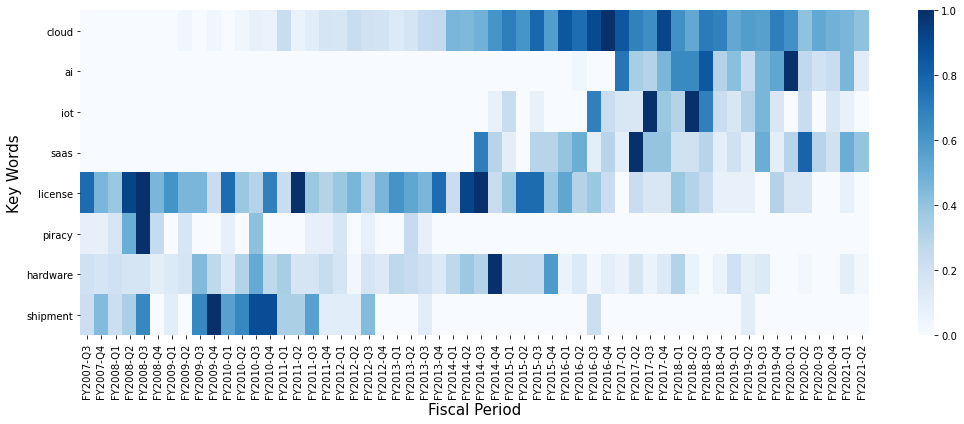

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.heatmap(df_msft_philstrat_1, cmap='Blues', annot=False)
ax.set_ylabel('Keywords', fontsize=15)    
ax.set_xlabel('Fiscal Period', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/keyword_frequency_heatmap1.png',dpi=600)

In [29]:
df_msft_philstrat_2 = df_msft.T.loc[['commercial','consumer','margin','cost','secular','differentiate','guidance','forecast']]

In [30]:
df_msft_philstrat_2.columns = pd.MultiIndex.from_tuples(fy_quarter_pair)

In [31]:
df_msft_philstrat_2 = df_msft_philstrat_2.div(df_msft_philstrat_2.max(axis=1), axis=0)

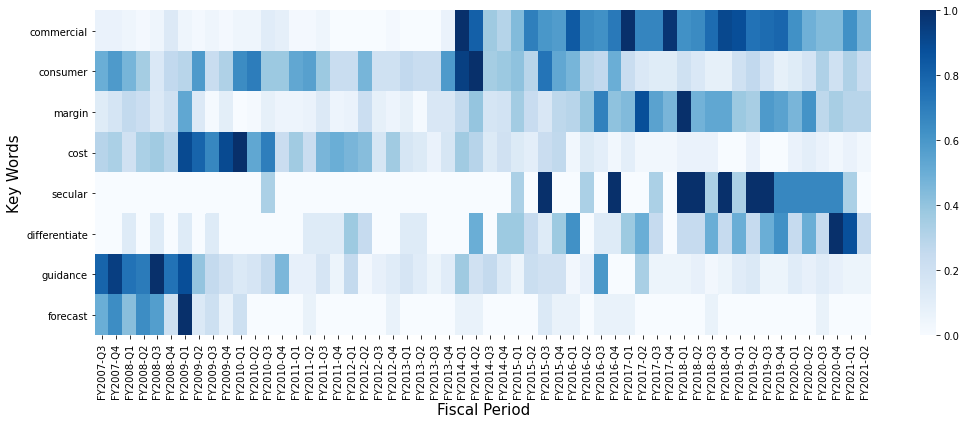

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.heatmap(df_msft_philstrat_2, cmap='Blues', annot=False)
ax.set_ylabel('Keywords', fontsize=15)    
ax.set_xlabel('Fiscal Period', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/keyword_frequency_heatmap2.png',dpi=600)

In [33]:
# Product history

In [34]:
df_msft.T.loc[['windows','office','nokia','bing','yahoo','xbox','linkedin','github']]

0   1   2   3   4   5  6  7  8  9  10  11  12  13  14  15  16  17  \
windows    1   3   2   1   1   0  0  1  0  1   3   1   1   1   3   1   0   2   
office    14   8  13  26   3  11  5  6  7  8   3   7  15  13  26  24  24  16   
nokia      0   0   0   0   0   0  0  0  0  0   0   0   0   0   0   0   7   2   
bing       0   0   0   0   0   0  0  0  0  4   5   3   3   2   4   5   5   3   
yahoo      0   0   0   0  24  20  1  1  0  0   7   4   4   2   3   4   6   6   
xbox       9  15   9  14   9   8  8  9  8  5   7   7   4   5   9   7  13  14   
linkedin   0   0   0   0   0   0  0  0  0  0   0   0   0   0   0   0   0   0   
github     0   0   0   0   0   0  0  0  0  0   0   0   0   0   0   0   0   0   

          18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
windows    2   2   2   1   3   1   1   3   1   2   2   1   0   1   2   2   1   
office    21  13   9  21  19  11  24  19  41  33  32  36  32  47  62  44  35   
nokia      1   6   2   2   1   1   0   1   5   6  10   7   3   0   1   2   0   
bing       4   2   1   4   4   1   1   0   2   1   3   7   6   3   8   4   4   
yahoo     10   1   0   3   0   1   0   0   0   0   0   0   0   0   2   1   0   
xbox      15  11   5  10   9  12   9   7  27  18   7   9  10  18  10  13   9   
linkedin   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
github     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

          35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
windows    1   3   0   1   0   1   3   1   2   1   2   1   0   1   0   0   0   
office    36  30  37  25  30  31  19  25  33  19  18  18  17  16  21  14  12   
nokia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
bing       2   0   4   2   2   2   1   2   0   1   1   1   1   1   0   1   1   
yahoo      0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
xbox      10  11  13   8   6   8   5  14  15   9   3   7   6   4   8   2   6   
linkedin   0   0   5   1  46  25  26  28  28  24  12  11  14  14  13  10  14   
github     0   0   0   0   0   0   0   0   0   0   4  17  12   4   7   6   9   

          52  53  54  55  
windows    0   0   0   0  
office    21  18  23  19  
nokia      0   0   0   0  
bing       0   0   0   0  
yahoo      0   0   0   0  
xbox       4   8   7   9  
linkedin  17   9  10   7  
github    11   9   4   1

## Wordcloud

In [35]:
cv_ballmer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_ballmer = cv_ballmer.fit_transform(corpus_ballmer).toarray()

cv_nadella = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_nadella = cv_nadella.fit_transform(corpus_nadella).toarray()

In [36]:
sum_words_ballmer = X_ballmer.sum(axis=0)
words_freq_ballmer = [(word, sum_words_ballmer[idx]) for word, idx in cv_ballmer.vocabulary_.items()]
words_freq_ballmer = sorted(words_freq_ballmer, key = lambda x:x[1], reverse=True)

sum_words_nadella = X_nadella.sum(axis=0)
words_freq_nadella = [(word, sum_words_nadella[idx]) for word, idx in cv_nadella.vocabulary_.items()]
words_freq_nadella = sorted(words_freq_nadella, key = lambda x:x[1], reverse=True)

In [37]:
ballmer_wordcloud = WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

(-0.5, 399.5, 329.5, -0.5)

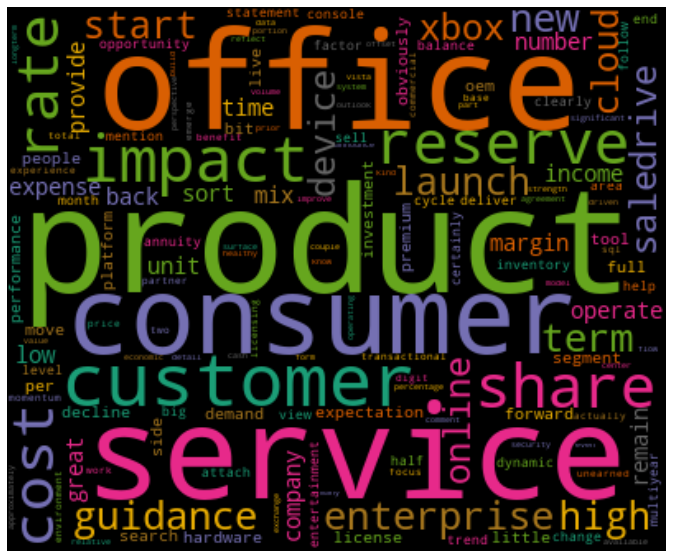

In [38]:
ballmer_wordcloud.generate_from_frequencies(dict(words_freq_ballmer))

plt.figure(figsize=(12,10))
plt.imshow(ballmer_wordcloud, interpolation="bilinear")
plt.axis("off")

In [39]:
nadella_wordcloud = WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

(-0.5, 399.5, 329.5, -0.5)

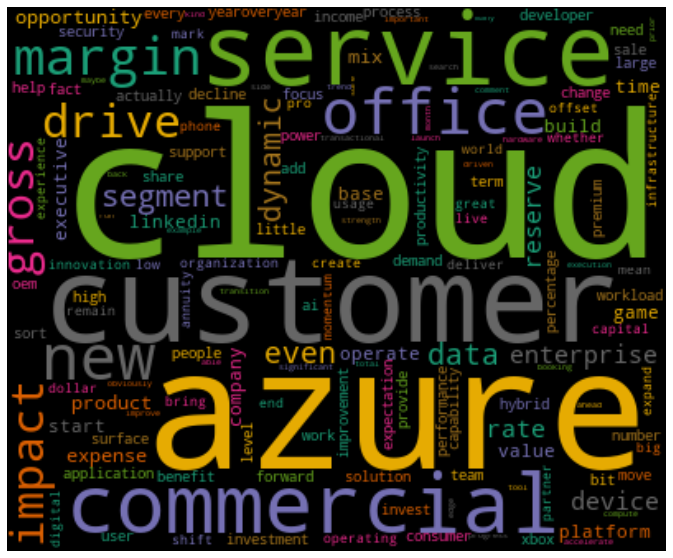

In [40]:
nadella_wordcloud.generate_from_frequencies(dict(words_freq_nadella))

plt.figure(figsize=(12,10))
plt.imshow(nadella_wordcloud, interpolation="bilinear")
plt.axis("off")

## Visualizing Word2Vec Word Embeddings using t-SNE

### Unigrams

In [41]:
model = word2vec.Word2Vec(corpus_msft)

In [42]:
model_selective = word2vec.Word2Vec(corpus_msft, min_count=100, window=20, ns_exponent = -10)

In [43]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.tight_layout()
    plt.savefig('../Charts/word2vec_tsne_plot', dpi=600)

<ipython-input-43-a3421f2b9004>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


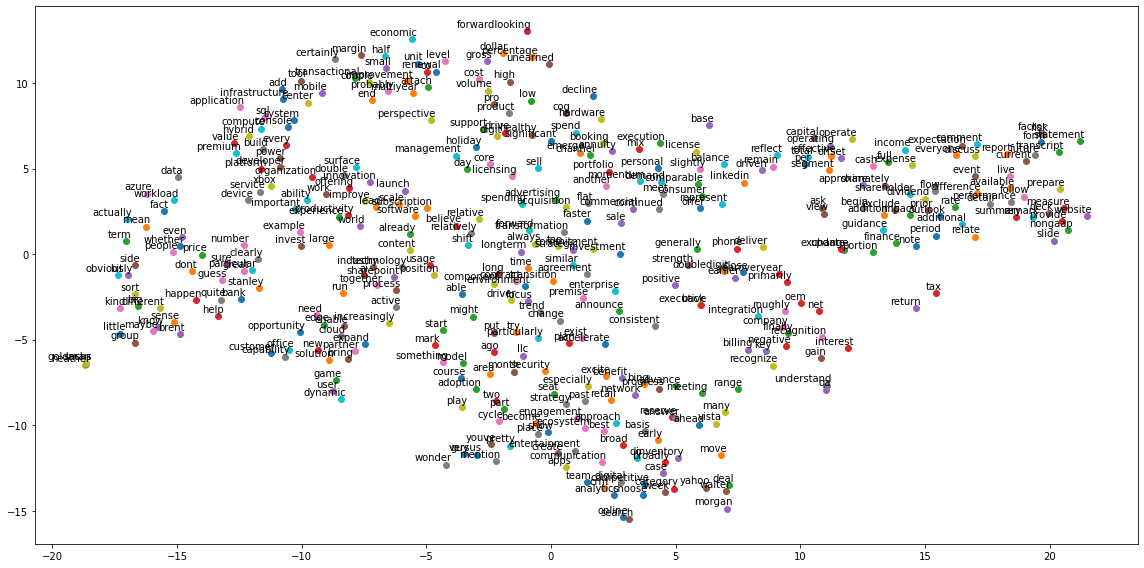

In [44]:
tsne_plot(model_selective)

In [45]:
model_selective.most_similar('licensing')

<ipython-input-45-0236558cda24>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_selective.most_similar('licensing')


[('transition', 0.9991642832756042),
 ('level', 0.9990688562393188),
 ('attach', 0.9988952279090881),
 ('similar', 0.9987536072731018),
 ('strategic', 0.9984080195426941),
 ('multiyear', 0.9982707500457764),
 ('agreement', 0.9981892704963684),
 ('economic', 0.9981578588485718),
 ('commitment', 0.9981245994567871),
 ('unit', 0.9980805516242981)]

### Bigrams

In [46]:
corpus_msft_bi = pickle.load(open('cleaned_corpus_bi_msft.pickle', 'rb'))

In [47]:
model_bi = word2vec.Word2Vec(corpus_msft_bi)

In [48]:
model_selective_bi = word2vec.Word2Vec(corpus_msft_bi, min_count=60, window=10, negative=100)

<ipython-input-43-a3421f2b9004>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


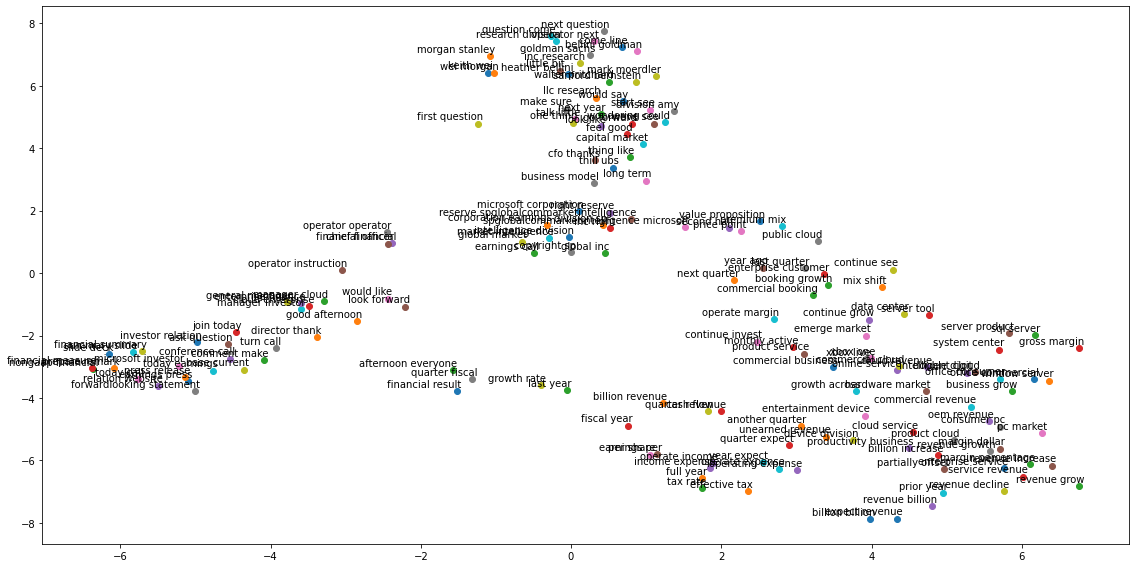

In [49]:
tsne_plot(model_selective_bi)